In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC

# Get Data

## Solana

In [2]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.535606,1.550610,1.430263,1.510898,1.510898,12763260
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
...,...,...,...,...,...,...
2022-04-18,100.407951,102.517029,95.242775,102.158531,102.158531,1846133932
2022-04-19,102.202385,108.582031,101.301727,108.582031,108.582031,1711909607
2022-04-20,108.602196,110.722977,104.772659,105.497002,105.497002,1761531528


<AxesSubplot:xlabel='Date'>

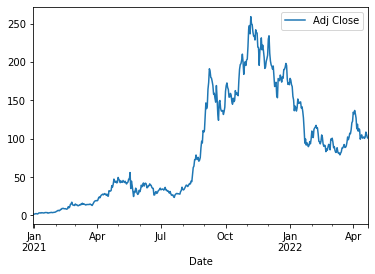

In [3]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [4]:
Ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
Ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,712.211975,760.348022,710.119019,756.732971,756.732971,2554269952
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
...,...,...,...,...,...,...
2022-04-18,2993.483887,3062.520996,2893.912842,3057.606689,3057.606689,18629381299
2022-04-19,3057.570312,3125.084229,3035.535156,3104.106445,3104.106445,14156035096
2022-04-20,3103.935059,3157.885742,3045.288330,3077.745850,3077.745850,15547362265


<AxesSubplot:xlabel='Date'>

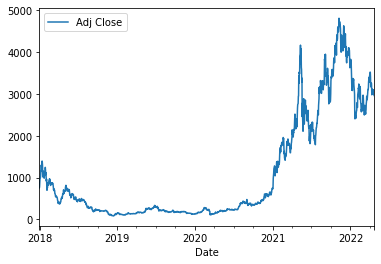

In [5]:
Ethereum_df.plot(y = "Adj Close", use_index=True)

## Rarible

In [59]:
dict_collections = {}
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/prices?filters=%7B%7D'


def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def get_collections_data(id):
    df = pd.read_json(url_collections.format(id))
    return df


df_id = get_collections_id(url_top_100)

for index, row in df_id.iterrows():
    dict_collections[row['name']] = get_collections_data(row['id'])

    
print(dict_collections)